In [1]:
#21120574 Nguyễn Minh Trí


<h1 align="center">TIME COMPARISON IN MUPTIPLYING 2-D MATRICES USING:</h1>
<h1 align="center">PYTHON LIST, NUMPY, C</h1>

In [2]:
!pip install numpy


**Import necessary libraries and modules**

- **time**: used to calculate the execution time of matrix multiplication
- **matplotlib.pyplot**: used to draw a graph representing the runtime
- **numpy**: uses the specialized function matmul() for calculating the product of two matrices
- **sys**: prints the process of matrix multiplication using python list (if needed)

In [3]:
import time
import numpy as np
import sys
import matplotlib.pyplot as plt

<h1> Generate 2 Matric Randomly </h1>

To conveniently measure the runtime for each matrix size automatically, for each matrix size, we must:

- Randomly generate two matrices to be used for the three matrix multiplication methods.
- Each element of the matrix has a random int value from -50 to 50.
- Finally, write the two matrices to the **‘input.txt’** file. This process allows us to automate the performance measurement of different matrix multiplication methods.

In [4]:

def Generate(N):
    # Tạo ma trận ngẫu nhiên
    N = int(N)
    a = np.random.randint(-50, 51, size=(N, N))
    b = np.random.randint(-50, 51, size=(N, N))

    # Mở file để ghi
    with open('input.txt', 'w') as f:
        # Ghi kích thước ma trận
        f.write(f"{N} {N} {N}\n\n")

        # Ghi ma trận a
        for row in a:
            f.write(' '.join(map(str, row)))
            f.write('\n')
        f.write('\n')

        # Ghi ma trận b
        for row in b:
            f.write(' '.join(map(str, row)))
            f.write('\n')
    print("               GENERATE SUCCESS ")


<h1 align="center"> MUPTIPLY </h1>

 SOME NECESSARY FUNCTIONS FOR MATRIX MULTIPLICATION USING THREE METHODS

<h1> 1.Muptiply 2 Matrices in Python, without using Numpy 

<h3>1.1 READ FILE </h3>

In [5]:
# Read file and assign to 2 matrix a b
def py_read():
    with open('input.txt', 'r') as f:
        n, m, p = map(int, f.readline().split())
        f.readline()
        a = [list(map(int, f.readline().split())) for _ in range(n)]
        f.readline()  # Đọc dòng trống
        b = [list(map(int, f.readline().split())) for _ in range(m)]
    return a,b
    # Khởi tạo ma trận kết quả

**Note**: n, m, p là kích thước 2 ma trận vuông.
Vì ban đầu em nghĩ là sẽ nhân 2 ma trận kích thước khác nhau
=> việc này không ảnh hưởng đến việc đo đạc trong bài tập này, mong thầy thông cảm bỏ qua <3 

<h3>1.2 MUPTIPLY 2 MATRICES WITH PURE PYTHON LIST</h3>

In [6]:

def py_muptiply(a,b,size,ans):
    size = int(size)
    for i in range(size):
        for j in range(size):
            for k in range(size):
                 ans[i][j] += a[i][k] * b[k][j]
                  
#         sys.stdout.write("\rTiến trình: %.2f%%" % (((i+1)/size)*100))
#         sys.stdout.flush()

<h1>2.Mupliply 2 Matrices using Numpy </h1>

In [7]:
def numpy_muptiply(aa,bb):
    ans = np.matmul(aa,bb)


<h1>3.Muptiply 2 Matrices using C </h1>

In [8]:

# %%bash

# gcc -o source.ipynb Source.c

# ./source.ipynb
def get_Ctime():
    output = !gcc Source.c -o main && ./main
    interval = float(output[0])
    return interval

<h1 align="center">MEASURING </h1>

- Initialize the array list_N, which represents the sizes of the matrices.
- Initialize three lists to store the runtime of the three methods.
- For each size:
    - Call the Generate() function to randomly generate a matrix.
    - Measure the runtime.
    - Record the runtime in the corresponding list. This process allows us to compare the performance of the three matrix multiplication methods for different matrix sizes.
    

In [9]:

list_N =[1,20,50,1e2,200,500,1000,1500]
list_N = [int(x) for x in list_N]

py_time=[]
numpy_time=[]
C_time=[]

for i in range(len(list_N)):
    temp_time = {}
    print(f"Time {i+1}, size of Matrix = {list_N[i]}")
    size = list_N[i]
    Generate(size)   # GENERATE 2 MATRIX
    a,b = py_read() # READ MATRIX FROM INPUT FILE
   
    
    ans = [[0]*size for _ in range(size)]
    py_start = time.time()
    py_muptiply(a,b,size,ans)
    py_end = time.time()
    py_time.append((-py_start + py_end)*1000)
    print("-----PYTHON SUCCESS-----")
    temp_time["py_time: "] = ((-py_start + py_end)*1000)
    
    numpy_start = time.time()
    numpy_muptiply(np.array(a),np.array(b))
    numpy_end = time.time()
    numpy_time.append((-numpy_start + numpy_end)*1000)
    print("-----NUMPY SUCCESS-----")
    temp_time["numpy time: "] =  (-numpy_start + numpy_end)*1000
    
    
    t = get_Ctime()*1000
    C_time.append(t)
    print("-----C SUCCESSS-----")
    temp_time["C time: "] = t
    
    print(temp_time)
          
          
print( "py time:",py_time)
print("numpy time:",numpy_time)
print("C time:",C_time)

Time 1, size of Matrix = 1
               GENERATE SUCCESS 
-----PYTHON SUCCESS-----
-----NUMPY SUCCESS-----
-----C SUCCESSS-----
{'py_time: ': 0.0064373016357421875, 'numpy time: ': 0.06079673767089844, 'C time: ': 0.000471}
Time 2, size of Matrix = 20
               GENERATE SUCCESS 
-----PYTHON SUCCESS-----
-----NUMPY SUCCESS-----
-----C SUCCESSS-----
{'py_time: ': 0.9744167327880859, 'numpy time: ': 0.10919570922851562, 'C time: ': 0.031479999999999994}
Time 3, size of Matrix = 50
               GENERATE SUCCESS 
-----PYTHON SUCCESS-----
-----NUMPY SUCCESS-----
-----C SUCCESSS-----
{'py_time: ': 14.744043350219727, 'numpy time: ': 0.5247592926025391, 'C time: ': 0.484404}
Time 4, size of Matrix = 100
               GENERATE SUCCESS 
-----PYTHON SUCCESS-----
-----NUMPY SUCCESS-----
-----C SUCCESSS-----
{'py_time: ': 119.87805366516113, 'numpy time: ': 2.202749252319336, 'C time: ': 4.056447}
Time 5, size of Matrix = 200
               GENERATE SUCCESS 
-----PYTHON SUCCESS-----
-----

<h1 align ="center"> DRAW THE CHART WITH MATPLOTLIB </h1>


From the array **list_N** and the three runtime lists: **py_time**, **numpy_time**,**C_time**, draw a graph representing the matrix size and the corresponding runtime of the three methods. This process allows us to visually compare the performance of the three matrix multiplication methods for different matrix sizes.

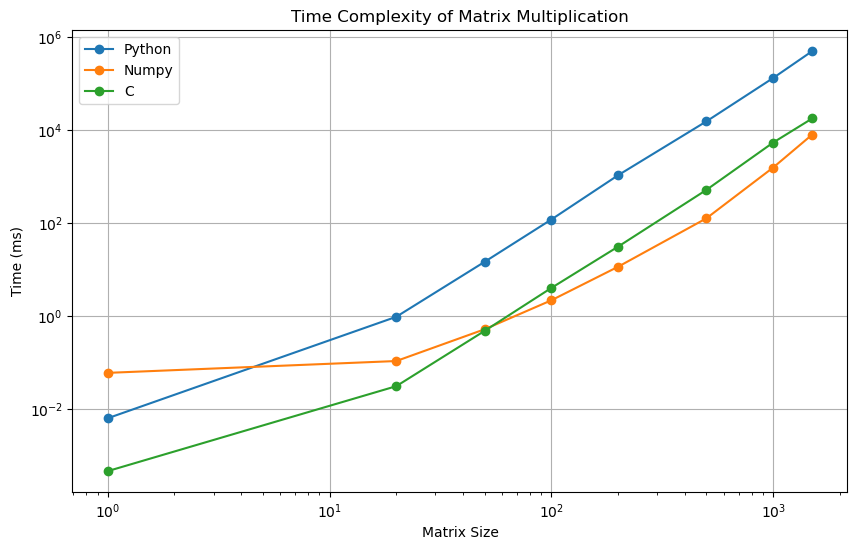

In [11]:

plt.figure(figsize=(10,6))
plt.loglog(list_N, py_time, 'o-', label='Python')
plt.loglog(list_N, numpy_time, 'o-', label='Numpy')
plt.loglog(list_N, C_time, 'o-', label='C')
plt.xlabel('Matrix Size')
plt.ylabel('Time (ms)')
plt.legend()
plt.title('Time Complexity of Matrix Multiplication')
plt.grid(True)
plt.show()

<h1 align ="center"> CONCLUSION </h1>



**Based on the above graph, we can make the following observations:**

- Python: Initially, with a 1x1 square matrix, Python list performs better than Numpy but is inferior to C. From the size of 10x10 onwards, Python list has the highest time complexity among the three methods. It is always about 100 times higher than Numpy and C. At large sizes, from about 500x500 onwards, there is a clear difference in the runtime of the program.

- Numpy: From size 1x1 to about 50x50, Numpy has a small time complexity, but it is still slightly higher than C. However, from size 100x100 onwards, Numpy has a better time complexity than C.

- C: We can see that the graph of C has the lowest slope, so we can say that C provides the most stable computation. Multiplying two matrices in C language does not have as high a time complexity as Python list, and it is only slightly higher than Numpy at large sizes.


